In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

Lab Report

https://www.overleaf.com/4314962354mjsdzsprcrfm


# Method I

In method I, we obtain the expression for G from eq. 1.9 of the manual:

$$ G = \pi^2 \Delta S b^2 \left( \frac{d^2 - 0.4r^2}{T^2 m_1 L d} \right) $$

**Parameters**

$\Delta S = ?$ (displacement between equilibrium positions $S_1$ and $S_2$)

$L = ?$ (distance between mirror and screen)

$T = ?$ (period of oscillation)

$b =  42.2 $ mm (distance between the centers of the two masses)

$d = 50 $ mm (length of the lever arm of the pendulum bob crosspiece)

$r = 9.55 $ mm (radius of small balls, $8.19$ mm on page 3)

$m_1 = 1.5 (\pm 0.01)$ kg (mass of large mass)


**Correction**

Due to mutual interaction between the bigger spheres, we computed the correction to the torsion. The correction value, $\beta$, is

$$ \beta = \frac{b^3}{(b^2 + 4d^2)^{3/2}} $$

So we will get the corrected $G_0$ as

$$ G_0 = \frac{G}{1 - \beta } $$


**Error**
$$\sigma_G = \sqrt{\sum _i \left(\frac{\partial G}{\partial q_i}\sigma_{q_i}\right)^2}$$

$$\frac{\partial G}{\partial \Delta S} = \pi^2 b^2 \left( \frac{d^2 - 0.4r^2}{T^2 m_1 L d} \right)$$

$$\frac{\partial G}{\partial T} = -2\pi^2 \Delta S b^2 \left( \frac{d^2 - 0.4r^2}{T^3 m_1 L d} \right)$$

$$\frac{\partial G}{\partial m_1} = -\pi^2 \Delta S b^2 \left( \frac{d^2 - 0.4r^2}{T^2 m_1^2 L d} \right)$$

$$\frac{\partial G}{\partial L} = -\pi^2 \Delta S b^2 \left( \frac{d^2 - 0.4r^2}{T^2 m_1 L^2 d} \right)$$

$$\sigma_{\Delta S} = \sqrt{\left(\frac{\partial\Delta S}{\partial S_1}\sigma_{S_1}\right)^2+\left(\frac{\partial\Delta S}{\partial S_2}\sigma_{S_2}\right)^2}=\sqrt{2}\sigma_{S_1}=\sqrt{2}\sigma_{S_2}$$

In [ ]:
# Constants
mm = 1e-3
b = 42.2 * mm # m
d = 50.0 * mm # m
r = 9.55 * mm # m

m1 = 1.5 # kg
beta = b ** 3 / ( b ** 2 + 4 * d ** 2 ) ** 1.5

def G_experiment_1(delta_S, L, T):

    front_factor = np.pi ** 2 * delta_S * b ** 2
    paren_factor = ( d ** 2 - 0.4 * r ** 2 ) / ( T ** 2 * m1 * L * d)

    G = front_factor * paren_factor

    G0 = G / ( 1 - beta)

    return G0


In [ ]:
# sanity check
T = 10 # seconds
delta_S = 10 * mm
L = 2.17

G_measured = G_experiment_1(delta_S, L, T)
print('Example G0: ', G_measured)



Example G0:  2.8266034444159825e-08


# Method II
In method II, we obtain the expression for G from eq. 1.9.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

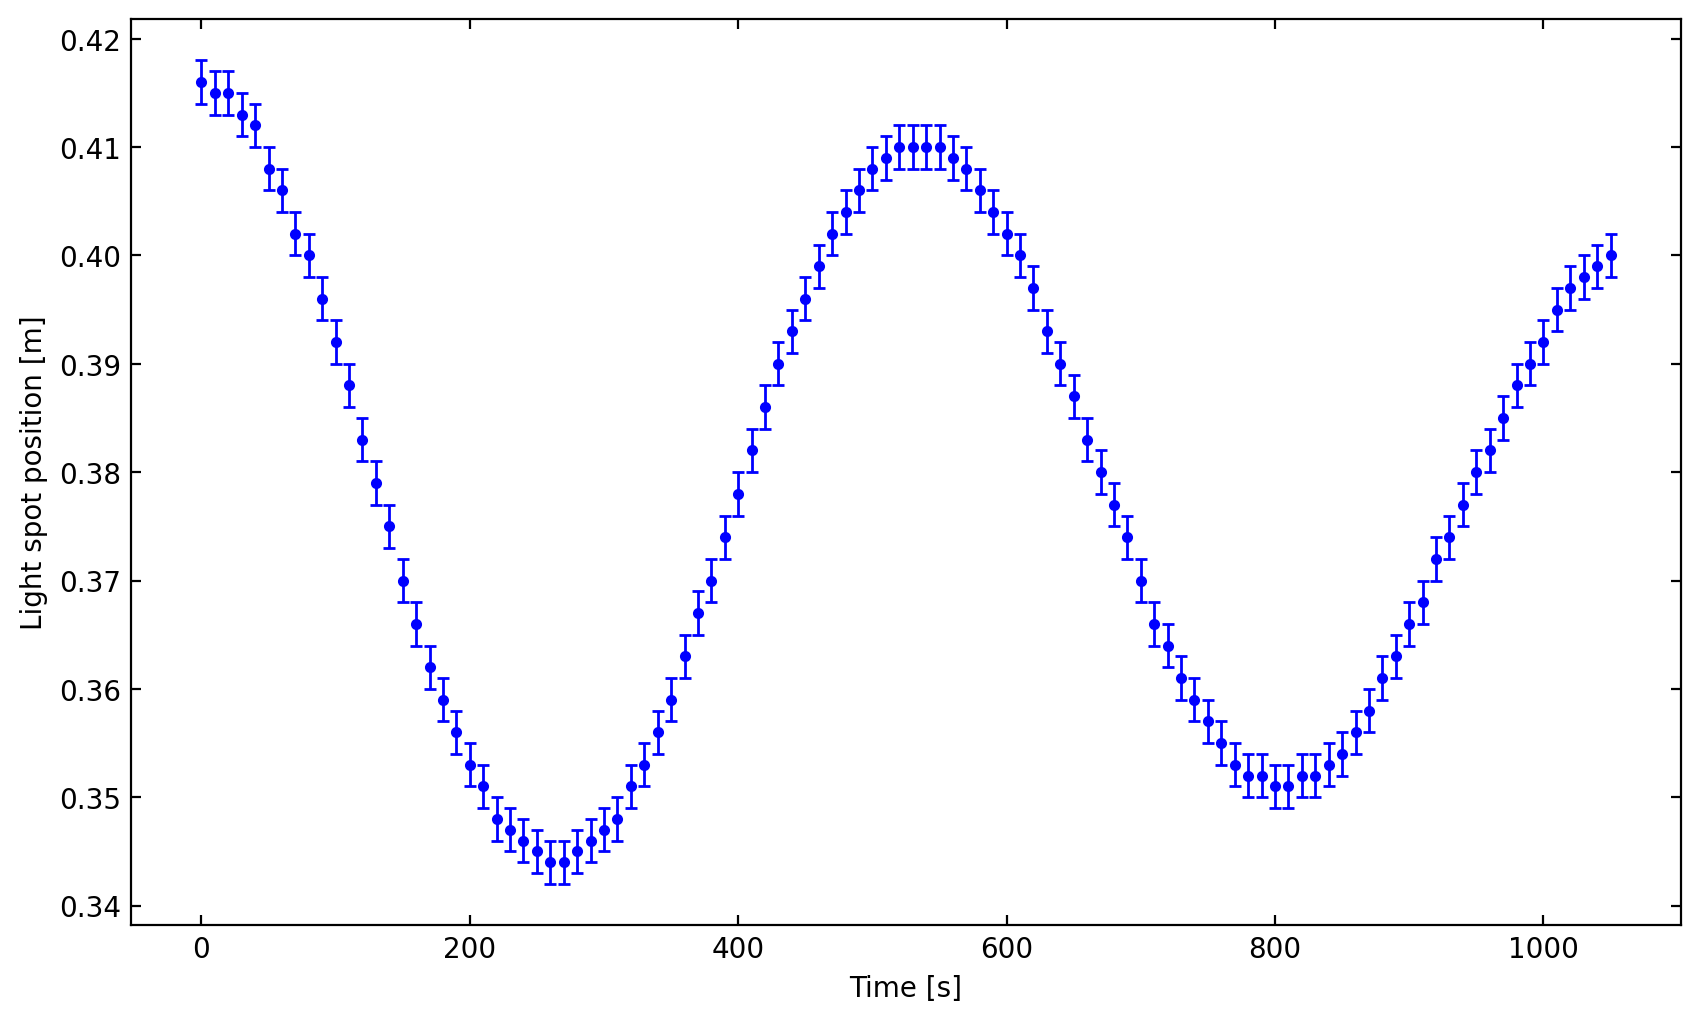

In [ ]:
worksheet6 = gc.open('Cavendish Data').get_worksheet(4)

plt.figure(figsize=(10,6), dpi = 200)
rows6 = worksheet6.get_all_values()
datapoint_S2 = pd.DataFrame.from_records(rows6[:][2:])
time_s2_eq = [float(t) for t in datapoint_S2[1]]
posi_s2_eq = [float(x)/100 for x in datapoint_S2[2]]
plt.xlabel('Time [s]')
plt.ylabel('Light spot position [m]')
plt.errorbar(time_s2_eq,posi_s2_eq,yerr=0.002, fmt='.b', ecolor='blue',elinewidth = 1, capsize=2)
plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')

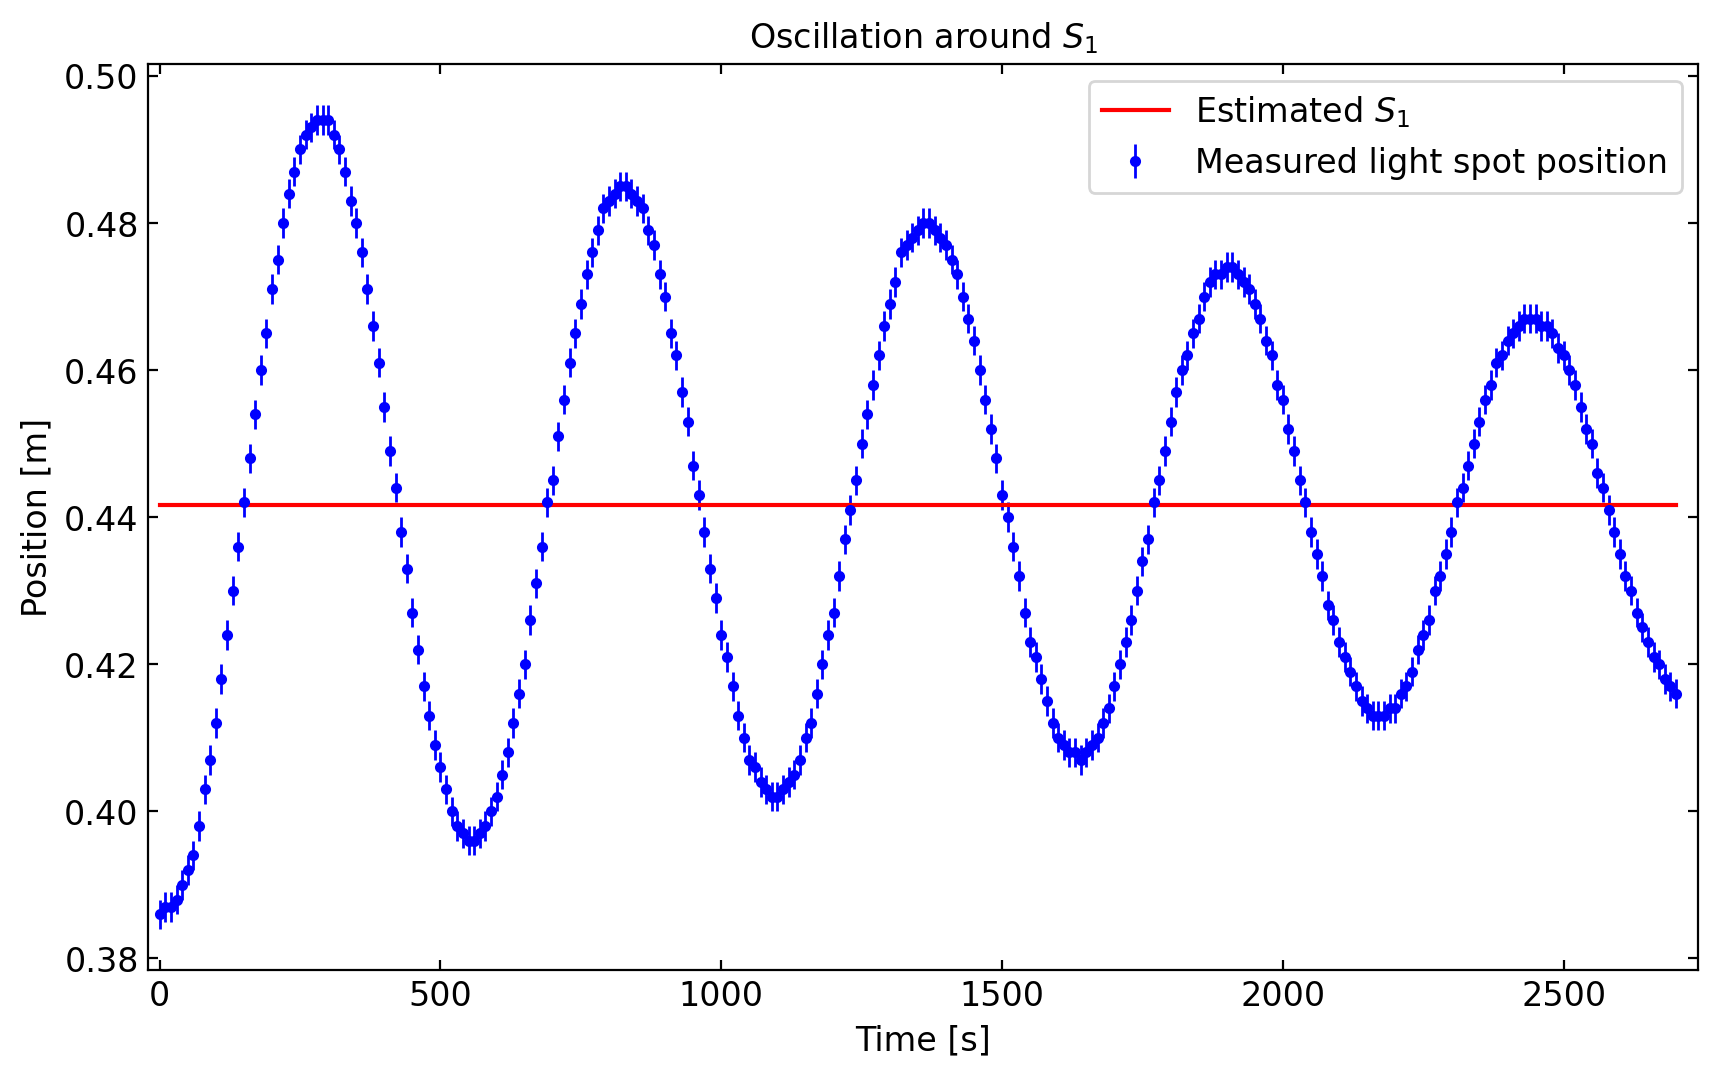

In [ ]:
worksheet7 = gc.open('Cavendish Data').get_worksheet(5)
rows7 = worksheet7.get_all_values()
datapoint_S1 = pd.DataFrame.from_records(rows7[:][2:])
time_s1_eq = [float(t) for t in datapoint_S1[1]]
posi_s1_eq = [float(x)/100 for x in datapoint_S1[2]]
mean_s1=np.mean(posi_s1_eq)
mean_s1_eq = [mean_s1]*len(posi_s1_eq)

plt.figure(figsize=(10,6), dpi = 200)

plt.errorbar(time_s1_eq,posi_s1_eq,yerr=0.002, fmt='.b', ecolor='blue',elinewidth = 1)
plt.plot(time_s1_eq, mean_s1_eq, 'r', label = 'Estimated S1')

plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Position [m]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(-20, 2740)
plt.legend(labels = ['Estimated $S_1$', 'Measured light spot position'], fontsize = 12)
plt.title('Oscillation around $S_1$')
plt.show()

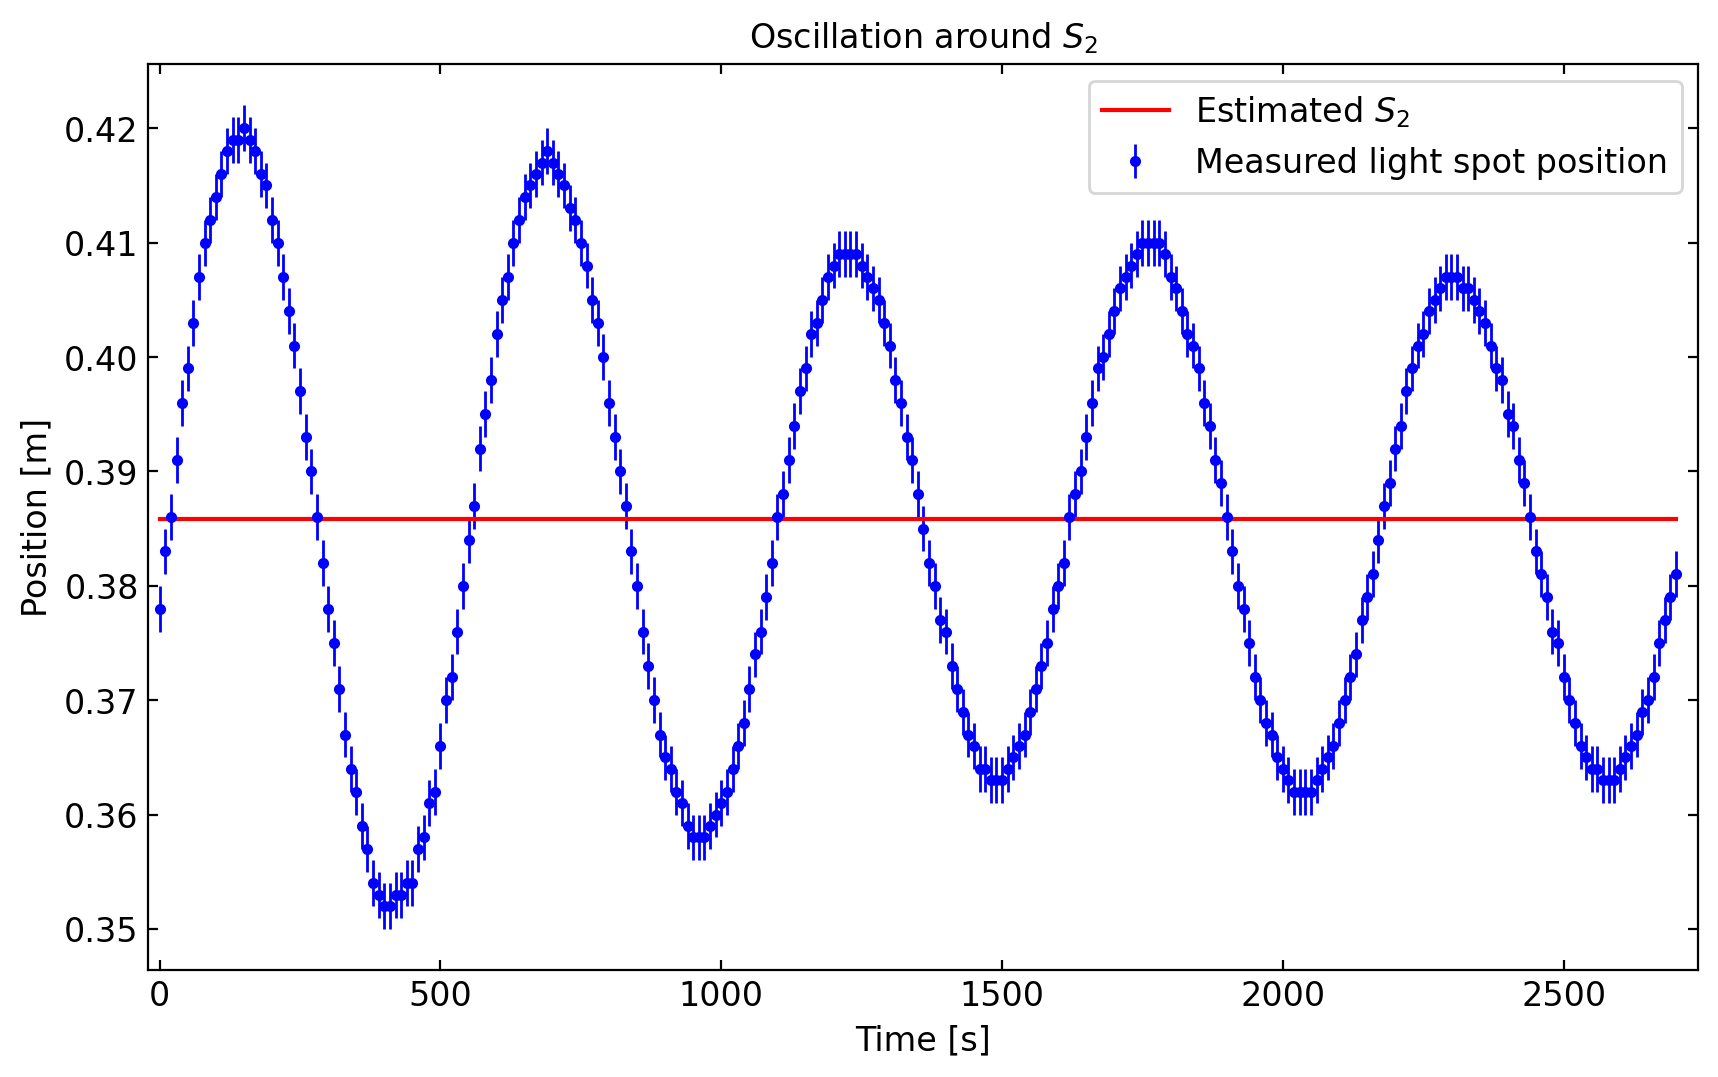

In [ ]:
worksheet8 = gc.open('Cavendish Data').get_worksheet(6)
rows8 = worksheet8.get_all_values()
datapoint_S2_c = pd.DataFrame.from_records(rows8[:][2:])
time_s2_c_eq = [float(t) for t in datapoint_S2_c[1]]
posi_s2_c_eq = [float(x)/100 for x in datapoint_S2_c[2]]
mean_s2=np.mean(posi_s2_c_eq)
mean_s2_eq = [mean_s2]*len(posi_s2_c_eq)

plt.figure(figsize=(10,6), dpi = 200)

plt.errorbar(time_s2_c_eq,posi_s2_c_eq,yerr=0.002, fmt='.b', ecolor='blue',elinewidth = 1)
plt.plot(time_s2_c_eq, mean_s2_eq, 'r', label = 'Estimated S2')

plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('Position [m]',fontsize=12)
plt.xlim(-20, 2740)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(labels = ['Estimated $S_2$', 'Measured light spot position'], fontsize = 12)
plt.title('Oscillation around $S_2$')
plt.show()

# Method III
In method III, we obtain the expression for G from eq. 3.4
$$G = \frac{b^2a_0}{2m_1}$$
where
$$a_0 = \frac{\Delta S d}{t^2 L}$$
$$G = \frac{b^2 \Delta S d}{2 m_1 t^2 L}$$

**Error**
$$\sigma_G = \sqrt{\sum _i \left(\frac{\partial G}{\partial q_i}\sigma_{q_i}\right)^2}$$

$$\frac{\partial G}{\partial \Delta S} = \frac{b^2 d}{2 m_1 t^2 L}$$

$$\frac{\partial G}{\partial t} = -\frac{b^2 \Delta S d}{m_1 t^3 L}$$

$$\frac{\partial G}{\partial L} = -\frac{b^2 \Delta S d}{2 m_1 t^2 L^2}$$

$$\frac{\partial G}{\partial m_1} = -\frac{b^2 \Delta S d}{2 m_1^2 t^2 L}$$



$$\sigma_{\Delta S} = \sqrt{\left(\frac{\partial\Delta S}{\partial S_1}\sigma_{S_1}\right)^2+\left(\frac{\partial\Delta S}{\partial S_2}\sigma_{S_2}\right)^2}=\sqrt{2}\sigma_{S_1}=\sqrt{2}\sigma_{S_2}$$

In [ ]:
def G_experiment_3(delta_S, L, t):
  acceleration = delta_S * d / (t**2 * L)
  G = b**2 * acceleration / (2 * m1)
  return G

In [ ]:
# test data
t = 45 # seconds
delta_S = 10 * mm
L = 2.17
G3 = G_experiment_3(delta_S, L, t)
G0 = G3 / ( 1 - beta)
print('Measured G = '+ str(G0))

Measured G = 7.17619461027383e-11


In [ ]:
worksheet = gc.open('Cavendish Data').get_worksheet(1)

Text(0, 0.5, 'x')

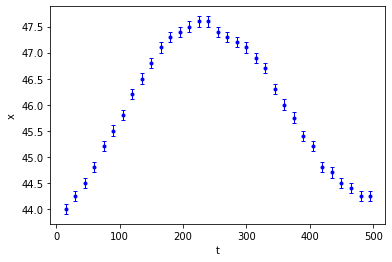

In [ ]:
# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
#print(rows)

datapoints = pd.DataFrame.from_records(rows[:][16:])
time = datapoints[0].tolist()
time_new = [sum(x * int(t) for x, t in zip([60, 1], elt.split(":"))) for elt in time]
position = datapoints[1].tolist()
posi_new = [float(x) for x in position]
plt.errorbar(time_new, posi_new, yerr=0.1, fmt='.b', ecolor='blue', elinewidth = 1, capsize=2)
plt.xlabel('t')
plt.ylabel('x')

In [ ]:
len(position)

33

In [ ]:
time_square = [float(x)**2 for x in time_new[:15]]
posi = [(float(x)-float(position[0]))*(10**(-2)) for x in position[:15]]

In [ ]:
def fit_line(x, b):
  return x*b

In [ ]:
end_index=10

In [ ]:
popt, pcov = curve_fit(fit_line, time_square[:end_index-5], posi[:end_index-5])

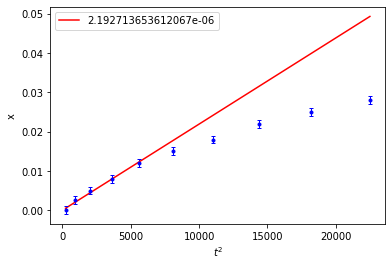

In [ ]:
plt.figure()
plt.plot(time_square[:end_index], fit_line(time_square[:end_index],popt),'r', label = popt[0])
plt.errorbar(time_square[:end_index], posi[:end_index],yerr=0.001,fmt='.b', ecolor='blue', elinewidth = 1, capsize=2) # 15 sec interval
plt.xlabel('$t^2$')
plt.ylabel('x')
plt.legend()
plt.show()

In [ ]:
L=2.14
acceleration =  popt[0]*d / L
G = b**2 * acceleration / (2 * m1)

3.0411777125377827e-11

## Final Linear Fit

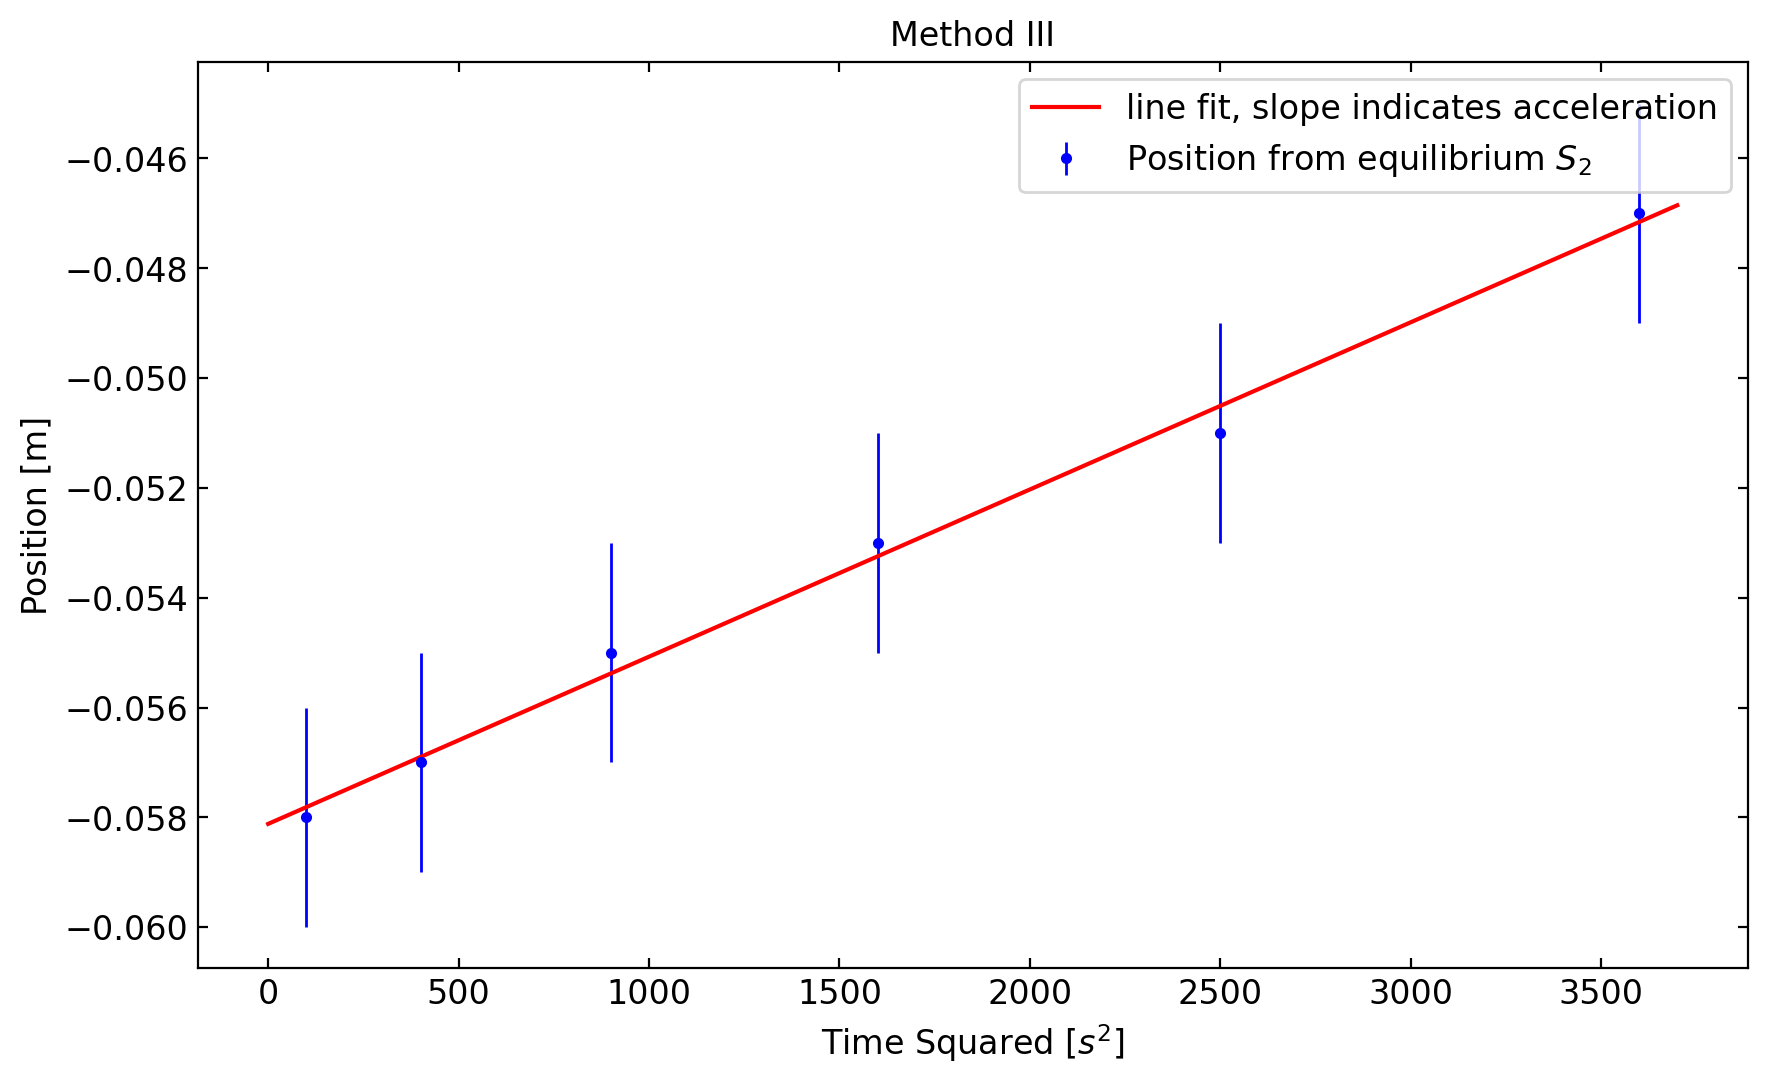

In [ ]:
##
## Final Linear Fit
##

# slope: 3.04525982e-06
# y-intercept: -5.81186441e-02


import numpy as np
from matplotlib import pyplot as plt

s = (np.array([38.7,38.8,39,39.2,39.4, 39.8])-44.5)*0.01
t = np.array([10, 20, 30, 40, 50, 60])*np.array([10, 20, 30, 40, 50, 60])

x = np.arange(0, 3700, 0.5)
y = x*3.04525982e-06 -5.81186441e-02



plt.figure(figsize=(10, 6), dpi=200)
#plt.plot(t, s, 'bo')
plt.errorbar(t,s,yerr=0.002, fmt='.b', ecolor='blue',elinewidth = 1)
plt.plot(x, y, 'r')
'''
plt.xlabel('Time Squared ($s^2$)')
plt.ylabel('Position from Equilibrium (m)')
# plt.savefig('MethodIII.png')
'''
plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
plt.xlabel('Time Squared [$s^2$]', fontsize=12)
plt.ylabel('Position [m]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlim(-20, 2740)
plt.legend(labels = ['line fit, slope indicates acceleration', 'Position from equilibrium $S_2$'], fontsize = 12)
plt.title('Method III')
plt.show()


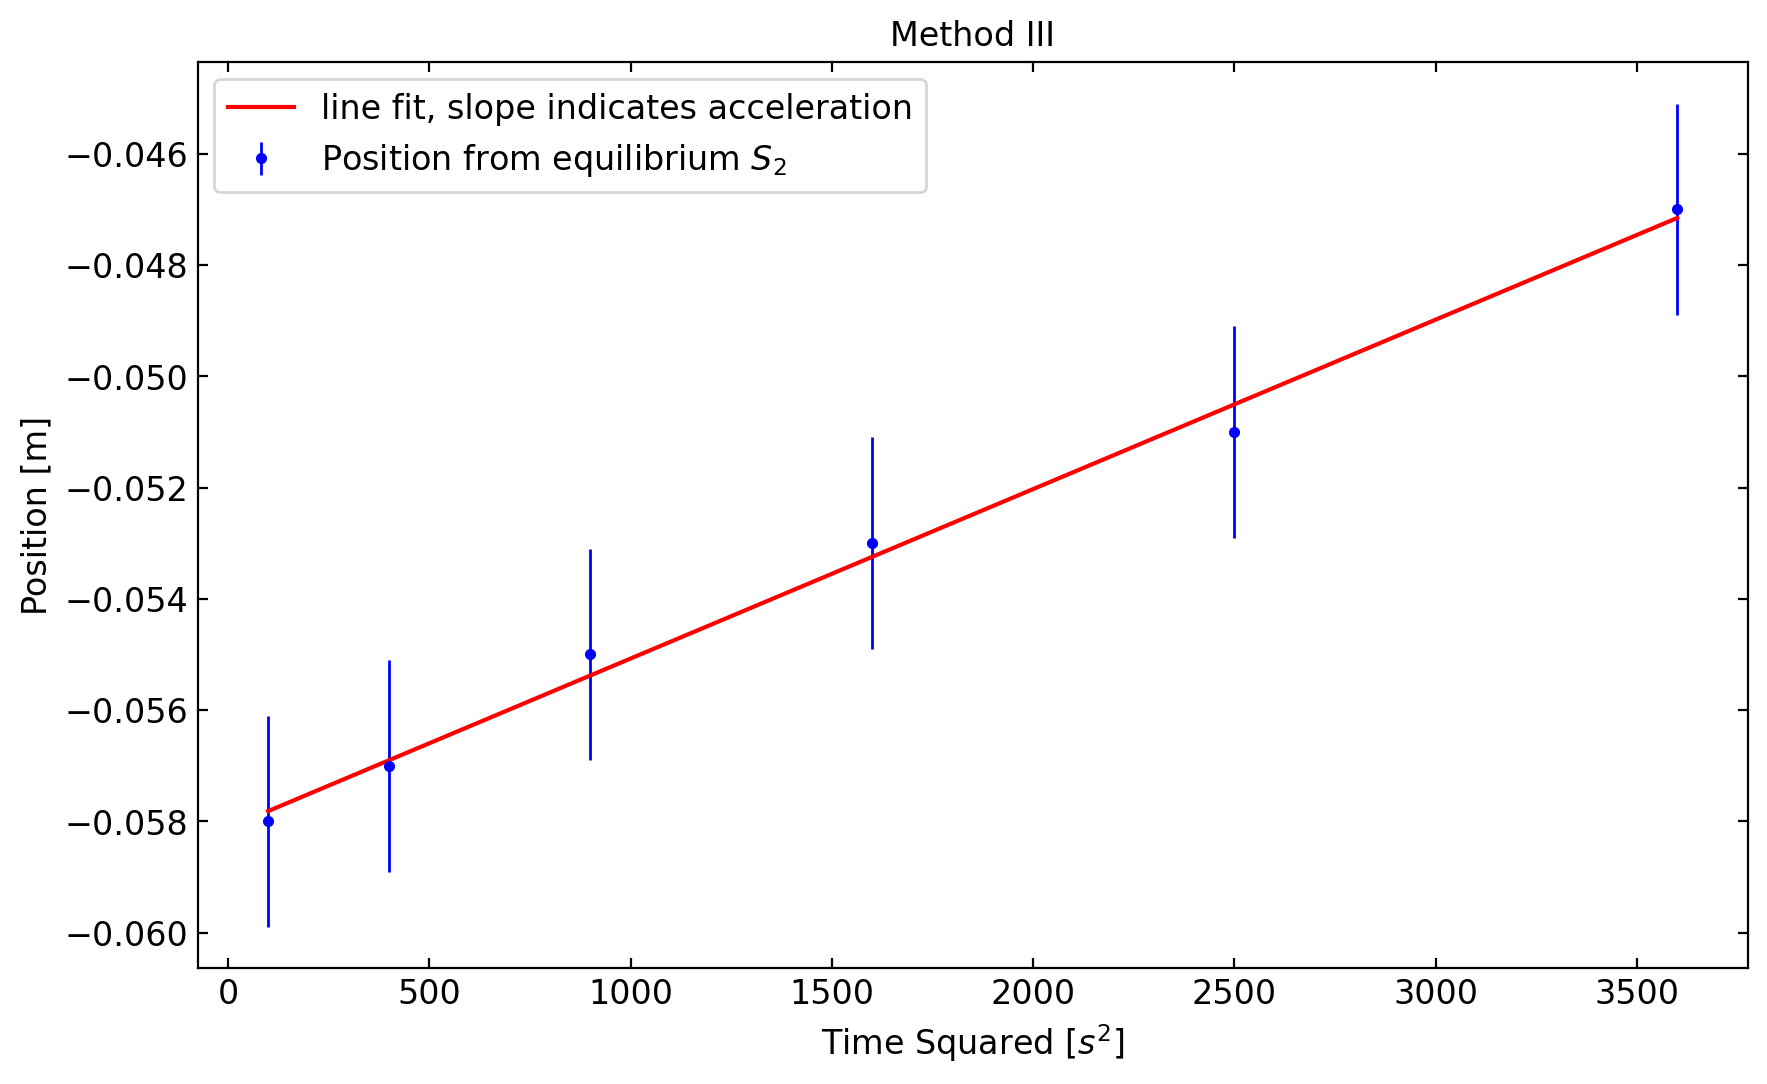

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y


s = (np.array([38.7,38.8,39,39.2,39.4, 39.8])-44.5)*0.01
t = np.array([10, 20, 30, 40, 50, 60])*np.array([10, 20, 30, 40, 50, 60])

xdata = t
ydata = s
d_y = np.array([0.0019,0.0019,0.0019,0.0019,0.0019,0.0019])

a_fit,cov=curve_fit(linearFunc,xdata,ydata,sigma=d_y,absolute_sigma=True)

#
# Compute uncertainty or whatever
#

inter = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

plt.figure(figsize=(10, 6), dpi=200)
##
## Plot the fit
##

plt.errorbar(xdata,ydata,yerr=d_y,fmt='.b', ecolor='blue',elinewidth = 1)

# Compute a best fit line from the fit intercept and slope.
yfit = inter + slope*xdata

# Create a graph of the fit to the data. We just use the ordinary plot
# command for this.
plt.plot(xdata,yfit, 'r', label='Fit')


plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
plt.xlabel('Time Squared [$s^2$]', fontsize=12)
plt.ylabel('Position [m]',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlim(-20, 2740)
plt.legend(labels = ['line fit, slope indicates acceleration', 'Position from equilibrium $S_2$'], fontsize = 12, loc='upper left')
plt.title('Method III')
plt.show()




In [ ]:
print('The uncertainty in the slope is {0}'.format(d_slope))

The uncertainty in the slope is 6.351590776649431e-07


In [ ]:
print(slope)

3.0452598263887725e-06
